# Assignment: Fuzzy Logic Hands-on Lab

In an era characterized by the ever-growing demand for sustainable and efficient energy solutions, the development of intelligent systems plays a pivotal role in addressing contemporary challenges. This project embarks on the creation of a groundbreaking Smart Energy Management System tailored for building environments. The primary objective is to design a sophisticated fuzzy logic system capable of dynamically determining the optimal lighting intensity. This innovative system operates at the intersection of environmental responsiveness and energy efficiency, leveraging three key input factors: the number of occupants within a room, the intensity of external natural light, and the ambient temperature. By seamlessly integrating these parameters, the system aims to deliver a tailored output— the precise lighting intensity required for optimal comfort, productivity, and energy conservation. This endeavor marks a significant stride towards sustainable building practices, illustrating the fusion of cutting-edge technology and environmental consciousness in the pursuit of a smarter, greener future.


In [33]:
# install "scikit-fuzzy" package
# this command is used to install or upgrade the scikit-fuzzy library using the Python package manager called pip.
!pip install -U scikit-fuzzy

In [34]:
# import libraries
import numpy as np # NumPy is a library for numerical operations in Python, and it is often used in scientific computing.
import skfuzzy as fuzz # Scikit-fuzzy is a library for fuzzy logic operations in Python. It provides tools for fuzzy system modeling and control.
from skfuzzy import control as ctrl #This line imports the control module from scikit-fuzzy and assigns it. The control module in scikit-fuzzy is used for building fuzzy control systems.

# Define input and output fuzzy variables and set the parameter
"""
These code are used to creates antecedent variable for occupancy, natural_light, temperature and light_intensity.
Antecedent variables represent the input variables in a fuzzy system.
"""
occupancy = ctrl.Antecedent(np.arange(0, 101, 1), 'Occupancy')
natural_light = ctrl.Antecedent(np.arange(0, 101, 1), 'NaturalLight')
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'Temperature')
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'LightIntensity')



# Specify membership functions for each variable
"""
This part is use to define fuzzy membership functions for the linguistic terms (low, medium, high)
associated with each of the fuzzy variables (Occupancy, NaturalLight, Temperature, and LightIntensity).
The membership functions are defined using triangular membership functions (fuzz.trimf).
For example, the three fuzzy sets for the "Occupancy" variable: low, medium, and high.
For 'low', it starts at 0, peaks at 0, and ends at 50.
For 'medium', it starts at 0, peaks at 50, and ends at 100.
For 'high', it starts at 50, peaks at 100, and ends at 100.
"""
occupancy['low'] = fuzz.trimf(occupancy.universe, [0, 0, 50])
occupancy['medium'] = fuzz.trimf(occupancy.universe, [0, 50, 100])
occupancy['high'] = fuzz.trimf(occupancy.universe, [50, 100, 100])

natural_light['low'] = fuzz.trimf(natural_light.universe, [0, 0, 50])
natural_light['medium'] = fuzz.trimf(natural_light.universe, [0, 50, 100])
natural_light['high'] = fuzz.trimf(natural_light.universe, [50, 100, 100])

temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 20, 40])
temperature['high'] = fuzz.trimf(temperature.universe, [20, 40, 40])

light_intensity['low'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])
light_intensity['medium'] = fuzz.trimf(light_intensity.universe, [0, 50, 100])
light_intensity['high'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])


# Create fuzzy rules
"""
This code is used to define a set of rules for fuzzy control system.
Each rule specifies a combination of conditions and an action to determine the output light intensity.
These rules are defined using the ctrl.Rule class from scikit-fuzzy.
These rules define the behavior of fuzzy system based on the input values of occupancy, natural light, and temperature.
"""
rule1 = ctrl.Rule(occupancy['low'] & natural_light['low'] & temperature['low'], light_intensity['low'])
rule2 = ctrl.Rule(occupancy['low'] & natural_light['low'] & temperature['medium'], light_intensity['low'])
rule3 = ctrl.Rule(occupancy['low'] & natural_light['low'] & temperature['high'], light_intensity['medium'])
rule4 = ctrl.Rule(occupancy['low'] & natural_light['medium'] & temperature['low'], light_intensity['low'])
rule5 = ctrl.Rule(occupancy['low'] & natural_light['medium'] & temperature['medium'], light_intensity['medium'])
rule6 = ctrl.Rule(occupancy['low'] & natural_light['medium'] & temperature['high'], light_intensity['medium'])
rule7 = ctrl.Rule(occupancy['low'] & natural_light['high'] & temperature['low'], light_intensity['medium'])
rule8 = ctrl.Rule(occupancy['low'] & natural_light['high'] & temperature['medium'], light_intensity['medium'])
rule9 = ctrl.Rule(occupancy['low'] & natural_light['high'] & temperature['high'], light_intensity['high'])
rule10 = ctrl.Rule(occupancy['medium'] & natural_light['low'] & temperature['low'], light_intensity['low'])
rule11 = ctrl.Rule(occupancy['medium'] & natural_light['low'] & temperature['medium'], light_intensity['low'])
rule12 = ctrl.Rule(occupancy['medium'] & natural_light['low'] & temperature['high'], light_intensity['medium'])
rule13 = ctrl.Rule(occupancy['medium'] & natural_light['medium'] & temperature['low'], light_intensity['low'])
rule14 = ctrl.Rule(occupancy['medium'] & natural_light['medium'] & temperature['medium'], light_intensity['medium'])
rule15 = ctrl.Rule(occupancy['medium'] & natural_light['medium'] & temperature['high'], light_intensity['medium'])
rule16 = ctrl.Rule(occupancy['medium'] & natural_light['high'] & temperature['low'], light_intensity['medium'])
rule17 = ctrl.Rule(occupancy['medium'] & natural_light['high'] & temperature['medium'], light_intensity['medium'])
rule18 = ctrl.Rule(occupancy['medium'] & natural_light['high'] & temperature['high'], light_intensity['high'])
rule19 = ctrl.Rule(occupancy['high'] & natural_light['low'] & temperature['low'], light_intensity['low'])
rule20 = ctrl.Rule(occupancy['high'] & natural_light['low'] & temperature['medium'], light_intensity['low'])
rule21 = ctrl.Rule(occupancy['high'] & natural_light['low'] & temperature['high'], light_intensity['medium'])
rule22 = ctrl.Rule(occupancy['high'] & natural_light['medium'] & temperature['low'], light_intensity['low'])
rule23 = ctrl.Rule(occupancy['high'] & natural_light['medium'] & temperature['medium'], light_intensity['medium'])
rule24 = ctrl.Rule(occupancy['high'] & natural_light['medium'] & temperature['high'], light_intensity['medium'])
rule25 = ctrl.Rule(occupancy['high'] & natural_light['high'] & temperature['low'], light_intensity['medium'])
rule26 = ctrl.Rule(occupancy['high'] & natural_light['high'] & temperature['medium'], light_intensity['high'])
rule27 = ctrl.Rule(occupancy['high'] & natural_light['high'] & temperature['high'], light_intensity['high'])

# Create fuzzy control system
"""
This part is used to created a ControlSystem for fuzzy control system by passing a list of rules to ctrl.ControlSystem.
"""
light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

# Provide input values to the fuzzy control system
"""
This code is used to creating a ControlSystemSimulation object named lighting_system using the previously defined control system light_ctrl.
This simulation object used to input specific values and compute the output based on the rules and membership functions that defined earlier.
"""
lighting_system = ctrl.ControlSystemSimulation(light_ctrl)

# define a function for easily reuse the function
def fuzzy_light_intensity(occupancy_para, naturalLight_para, temperature_para):
  # Setting input values for fuzzy control system simulation using the lighting_system.
  lighting_system.input['Occupancy'] = occupancy_para
  lighting_system.input['NaturalLight'] = naturalLight_para
  lighting_system.input['Temperature'] = temperature_para

  # Obtain the output
  """
  This code is used to instructing the ControlSystemSimulation object to calculate the output of the fuzzy control system based on the input values that previously set.
  """
  lighting_system.compute()

  # View the output
  print("Output Light Intensity:", lighting_system.output['LightIntensity'])

  # Visualize the membership functions and the input/output
  occupancy.view(sim=lighting_system)
  natural_light.view(sim=lighting_system)
  temperature.view(sim=lighting_system)
  light_intensity.view(sim=lighting_system)


Output Light Intensity: 33.200934579439284


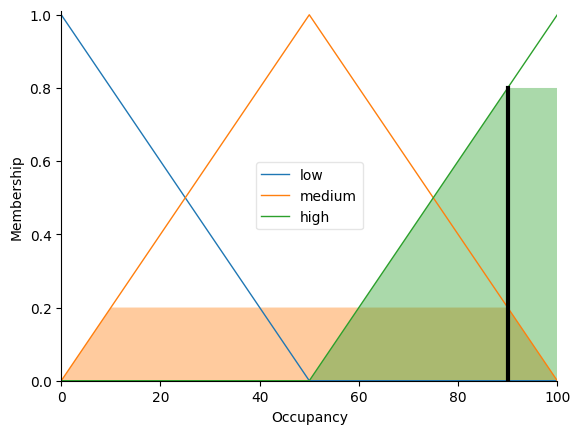

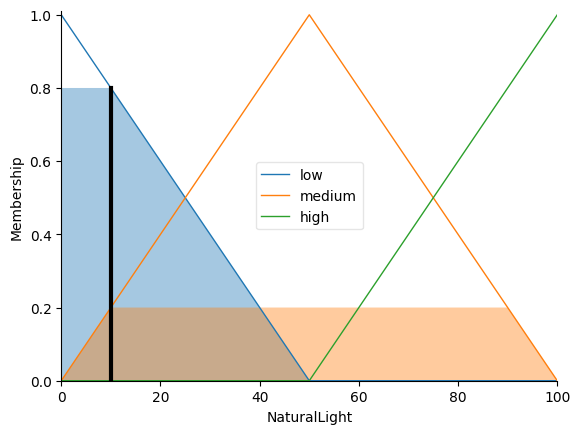

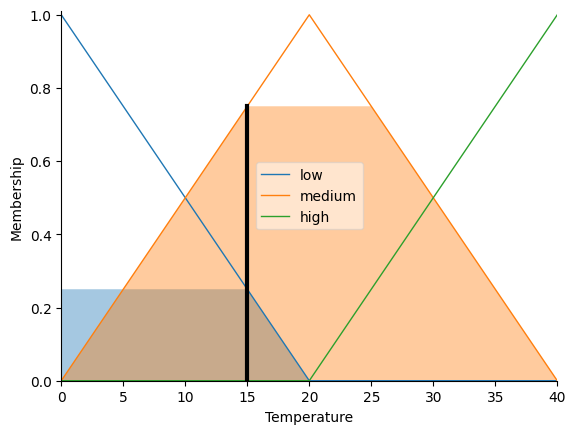

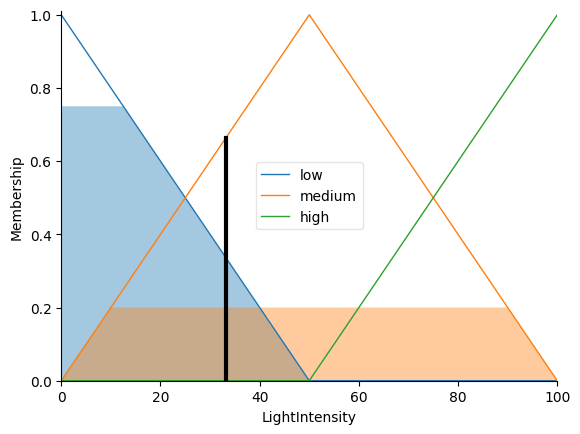

In [35]:
# In this case, we set the occupancy to 90, Natural Light in 10 and Temperature to 15.
fuzzy_light_intensity(90, 10, 15)

Output Light Intensity: 62.70520856652484


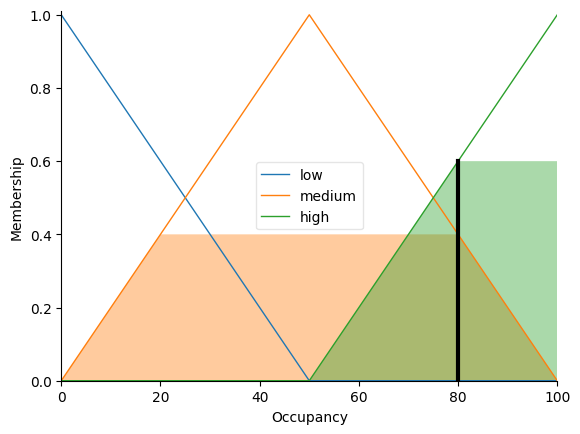

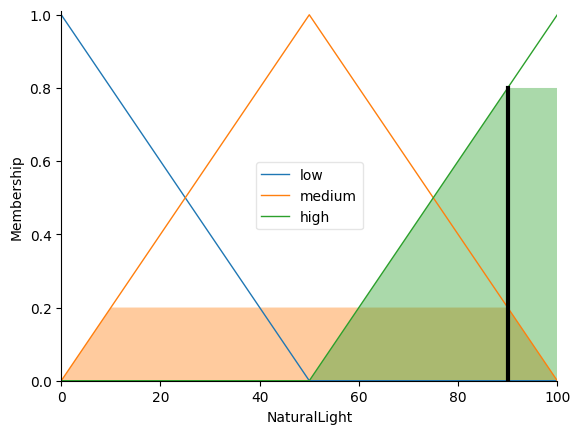

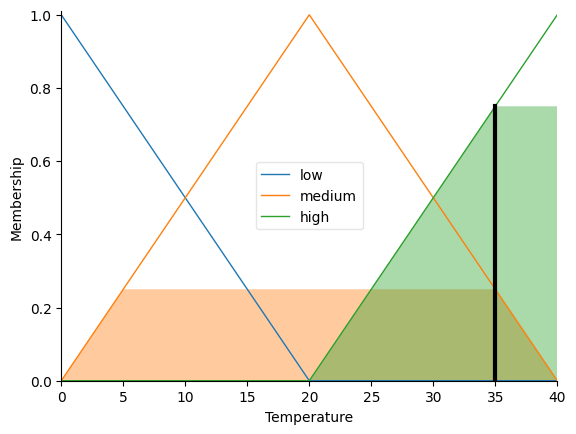

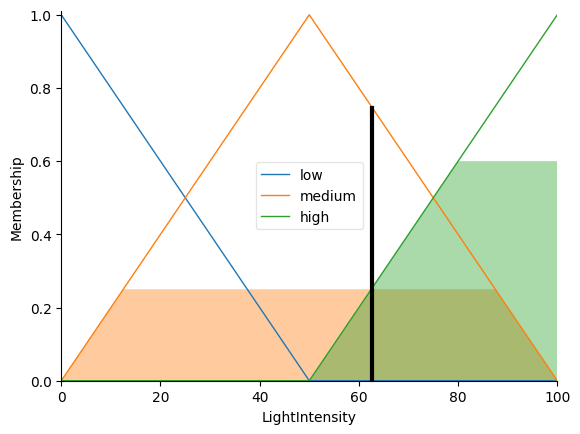

In [36]:
# Now, we set the occupancy to 80, Natural Light in 90 and Temperature to 35.
fuzzy_light_intensity(80, 90, 35)

In the above 2 example, we can observe the relationship between theh membership with those variable. Every variable are set to 3 situation which is low, medium and high.

The first fuzzy system, we set the occupancy to 90, Natural Light in 10 and Temperature to 15. According to this input, the result of light intensity is 33.2. The light intensity is low because the natural light and temperature is low, but occupancy is high. And from this result, we may guess that in that time may is a night time or it is raining in outside, so that the occupancy is more because everyone stay in room in that time, and the natural light and temperature is low. As a smart energy management system for a building, the system can automatically increase the power of the light tube in the building.

However, the second example show that the occupancy is 80, Natural Light in 90 and Temperature is 35. The result from this situation is 62.7. From this result we may know that the natural light is high and temperature is high too, so we can guess that it is in the day time. In this situation, the system can decide to turn off the light in the building to save the energy consumption.

From those example, we can know that how fuzzy logic is use to know the light intensity by using occupancy, natural light and temperature. According the result, the energy management system can adaptively adjust the brightness or power of the light tube. It can help to improve the use of energy consumption in the building and use the energy effectively without any waste.

In [37]:
t = 0
for x in range(0, 101, 10):
  # Setting input values for fuzzy control system simulation using the lighting_system.
  lighting_system.input['Occupancy'] = x
  lighting_system.input['NaturalLight'] = x
  if t < 40: t = x
  lighting_system.input['Temperature'] = t

  # Obtain the output
  """
  This code is used to instructing the ControlSystemSimulation object to calculate the output of the fuzzy control system based on the input values that previously set.
  """
  lighting_system.compute()

  # View the output
  print(f"Occupancy: {x} Naural Light: {x} Temperature: {t} Output Light Intensity: {lighting_system.output['LightIntensity']}")

Occupancy: 0 Naural Light: 0 Temperature: 0 Output Light Intensity: 16.666666666666664
Occupancy: 10 Naural Light: 10 Temperature: 10 Output Light Intensity: 37.028985507246425
Occupancy: 20 Naural Light: 20 Temperature: 20 Output Light Intensity: 41.21951219512202
Occupancy: 30 Naural Light: 30 Temperature: 30 Output Light Intensity: 45.82329317269077
Occupancy: 40 Naural Light: 40 Temperature: 40 Output Light Intensity: 50.00000000000001
Occupancy: 50 Naural Light: 50 Temperature: 40 Output Light Intensity: 50.000000000000014
Occupancy: 60 Naural Light: 60 Temperature: 40 Output Light Intensity: 50.95238095238092
Occupancy: 70 Naural Light: 70 Temperature: 40 Output Light Intensity: 53.76811594202898
Occupancy: 80 Naural Light: 80 Temperature: 40 Output Light Intensity: 58.78048780487803
Occupancy: 90 Naural Light: 90 Temperature: 40 Output Light Intensity: 67.25490196078434
Occupancy: 100 Naural Light: 100 Temperature: 40 Output Light Intensity: 83.33333333333336


For these code, the for loop is use to input the data for those variable to observe the result for Light Intensity in different situation. The for loop is set "x" from 0 and it will increase everytime until it achieve 101. Due to the maximum of the temperature is only 40, a variable "t" is set for the temperature, the t will change according the x until it more than 40 by using if condition. From the result, we can see that the light intenstiy will increase when occupancy, natural light and temperature is increase.

# Discussion
1. How the fuzzy logic system can be applied to optimize energy consumption in the building.

  The fuzzy logic system optimize the energy consumption by dynamically adjust lighting intensity based on those possible factors, such as the natural light intensity and etc. For example, if the natural light is strong, the system can reduce the power of the light tube or shut down the light tube automatically. By consider those information, the system can optimize the use of natural light, reducing the need for light tube during daylight hours. This adaptability ensures that energy is not wasted on unnecessary lighting, leading to significant energy savings. The fuzzy logic system is good in handling the dynamic and changing conditions. So that, the system can change the power of light tube based on those factor in real-time. This is important for match the different use throughout the day.

2. Propose additional input variables or fuzzy rules that could further enhance the system's performance.

  a. Task type: Different tasks may need different intensity of light. For example, reading need more light than folding clothes.
  b.  Time: The time of the day may effect the intensity of the light in room. By adding this rules, the system can adjust the lighting intensity based on the time of the day. For example, increase the power of the light tube when it came to night time.
